In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import pickle
import os

In [2]:
# loading our dataframes
#we will be using df_m for our sample of math class studetns and df_p for our sameple of portugees class. 

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [3]:
#dropping outliners
df_m = df_m.drop(df_m[(df_m['G3'] == 0) & (df_m['absences'] == 0)].index)
df_p = df_p.drop(df_p[(df_p['G3'] == 0) & (df_p['absences'] == 0)].index)

In [4]:
# identify what columns of the dataset we can take and include in our linear regression model
df_m.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
#first let's create a new dataframe with specific columns we want to feed our model 
#for the linear regression model we will be using G3 that represent the final grade of studetns 

new_df_m = df_m[['G1','G2', 'G3', 'romantic', 'sex']]
new_df_p = df_p[['G1','G2','G3', 'romantic', 'sex']]

In [6]:
#transforming the categorical variable column to binomial format (true and false) 
new_df_m = pd.get_dummies(new_df_m, columns=['romantic', 'sex'])
new_df_p = pd.get_dummies(new_df_p, columns=['romantic', 'sex'])

In [7]:
#changes check 
new_df_m.head()

,G1,G2,G3,romantic_no,romantic_yes,sex_F,sex_M
0,5,6,6,True,False,True,False
1,5,5,6,True,False,True,False
2,7,8,10,True,False,True,False
3,15,14,15,False,True,True,False
4,6,10,10,True,False,True,False


In [8]:
#making sure that all columns have approprite format
print(new_df_m.dtypes)
print(new_df_p.dtypes)

G1              int64
G2              int64
G3              int64
romantic_no      bool
romantic_yes     bool
sex_F            bool
sex_M            bool
dtype: object
G1              int64
G2              int64
G3              int64
romantic_no      bool
romantic_yes     bool
sex_F            bool
sex_M            bool
dtype: object


In [9]:
new_df_m.columns

Index(['G1', 'G2', 'G3', 'romantic_no', 'romantic_yes', 'sex_F', 'sex_M'], dtype='object')

In [10]:
#give the value to X and Y. Since we have 2 DF we will use X1 and Y1 for math class related lines and X2, Y2 for Port class
X1 = new_df_m[['G1', 'G2', 'romantic_no', 'romantic_yes', 'sex_F', 'sex_M']]  
y1 = new_df_m['G3']

X2 = new_df_p[['G1', 'G2','romantic_no', 'romantic_yes', 'sex_F', 'sex_M']]  
y2 = new_df_p['G3']


In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)



In [12]:

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [13]:
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

In [14]:
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print('Mean Squared Error for M class:', mse1)
print('R-squared for M class:', r2_1)

print(" ")
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print('Mean Squared Error for P class:', mse2)
print('R-squared for P class:', r2_2)

Mean Squared Error for M class: 0.6888465873714983
R-squared for M class: 0.9284988745382967
 
Mean Squared Error for P class: 0.8733143778705178
R-squared for P class: 0.8934420098596425


In [15]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

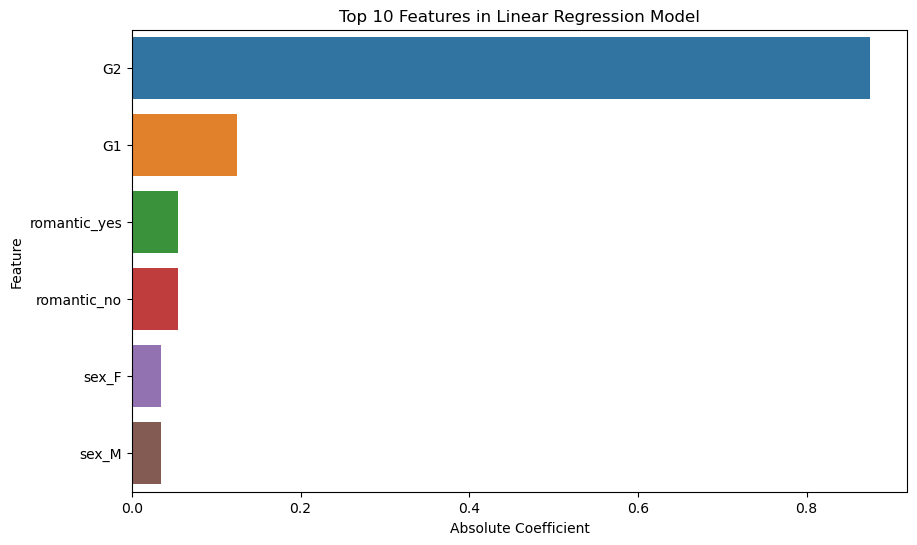

In [16]:
coefficients = model1.coef_

# Create a DataFrame for feature names and their corresponding coefficients
feature_names = 'G1', 'G2', 'romantic_no', 'romantic_yes', 'sex_F', 'sex_M' 
# Feature names after one-hot encoding
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort and visualize
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(10), x='Abs_Coefficient', y='Feature')
plt.title('Top 10 Features in Linear Regression Model')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

# Modeling (Charles)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.metrics import r2_score

In [3]:
# load our newly transformed dataframe

df_p = pd.read_csv('../data/student-por-cleaned.csv')

In order to proceed with our statistical analysis, we need to formulate our null and alternative hypothesis based on the topic we have been tackling. So far, we have been basing our analysis around whether or not alcoholic drinking during the weekday and weekend has an effect on student academic performance. We have also tackled the possibility of whether or not the students living together or not had an effect on the students academic perfomance.

Since there was only 80 students who's parents were seperated compared to the 569 who lived together, we can get rid of that topic since we do not have enough data to determine whether or not parents living together or not would affect students academic performance.

So for now, our null hypothesis for the topics we were analyzing is that there is no impact between drinking during the week and on the weekends and student academic performance. The alternative hypothesis is that there is an influence with drinking and students academic performance.

# Linear Regression Modeling

In [4]:
# running the test and train code for the data to fit the model and prepare it for regression
y = df_p['G3']
x = df_p.drop('G3', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=68)

In [5]:
# scale the data for regression
scale = StandardScaler()
scale.fit(x_train)
scale.transform(x_train)

array([[-0.48990242, -0.36446897, -0.5419104 , ...,  0.54837694,
         0.46546951, -2.56782982],
       [-1.45247707, -0.36446897, -0.5419104 , ..., -0.88834108,
        -0.55814217,  0.38943391],
       [ 1.6824655 ,  1.3893124 , -0.5419104 , ..., -2.3250591 ,
        -1.24054995,  0.38943391],
       ...,
       [-0.61614172, -0.36446897, -0.5419104 , ...,  0.18919743,
         0.46546951, -2.56782982],
       [ 0.54631182, -0.36446897, -0.5419104 , ..., -0.52916158,
        -0.21693828,  0.38943391],
       [ 0.94080963, -0.36446897, -0.5419104 , ...,  0.90755644,
         0.46546951,  0.38943391]])

In [6]:
# fits the data to the model and then runs the linear regression to it
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [7]:
# MSE and R squared values are outputed here

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error: ', mse)
print('R-squared:', r2)

Mean Squared Error:  2.414679582266468
R-squared: 0.7904657301172577


# Ridge Regression Model

In [8]:
# Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train, y_train)

train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)

print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.8707029447557642
The test score for ridge model is 0.7898750588326082


# Lasso Regression Model

In [9]:
# Lasso Regression Model

lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
train_score_lasso = lasso.score(x_train, y_train)
test_score_lasso = lasso.score(x_test, y_test)

print("The train score for lasso model is {}".format(train_score_lasso))
print("The test score for lasso model is {}".format(test_score_lasso))

The train score for lasso model is 0.03310317955891762
The test score for lasso model is 0.013999121222577293


# Overall Analysis

According to my results, my Linear Regression Model for the portuguese class gave me a Mean Squared Error of 2.414679582266468 and an R- Squared value of 0.7904657301172577.

With my Ridge Regression Model, I got a train score of 0.8707029447557642 and a test score of 0.7898750588326082.

With my Lasso Regression Model, I got a train score of 0.03310317955891762 and a test score of 0.013999121222577293.

So all in all my Ridge Regression Model performed better on my dataset and gave me a better result. It peanlized the coefficients by bringing them closer to 0.